## Kolmogorov-Smirnov Segmentation Algorithm

***

This nonparametric segmentation algorithm proposes a way to avoid the problem that non-linear time-series usually are non-stationary, i.e., its statistics vary in time, limitting the use of traditional methods of analysis. The objetive is to find local stationary epochs, so that statitical parameters like the mean, variance, etc, can be calculated and compared across all the segments.

The algorithm is based on the Kolmogorov-Smirnov test, a fully nonparametric test of the equality of continuous, one dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample KS test), or to compare two samples (two-sample KS test). It allows to test whether two samples come from the same distribution, which is done by evaluating the difference between the two empirical CDFs and denoting the maximum absolute distance as the KS distance, denoted by $D_{KS}^{max}$.

The algorithm works as follows. Given a segment of a time-series, $x_i$, $i_1 \leq i \leq i_n$, a pointer, initially at $i = i_p$, moves, dividing the original series in two segments, $S_E = \{x_{i_1}, \dots , x_{i_p}\}$ and $S_D = \{x_{i_{p+1}}, \dots , x_{i_n}\}$. The pointer moves so that the length of each segment ($n_E = i_p - i_1 + 1$ and $n_D = i_n - i_p$) is at least unitary. In each movement, the parameter $D = D_{KS}(1/n_E + 1/n_D)^{-1/2}$, the \textit{Kolmogorov-Smirnov Distance}, is computed. Finally, we choose the index $i_p$ so that $D_{i_p}$ is maximum, and it's compared to a critical value $D_{crit}^{max}(n) = a(ln(n) - b)^c$, where $n = n_L + n_R$ and $(a,b,c)$ are parameters, which is the expected value if the data distribution was random. If $D_{max} > D_{crit}^{max}$, then $i_p$ will be a segmentation point. The algorithm is recursivelly applied in each segment until $D_max \leq D_{crit}^{max}$, when it's not possible to do another segmentation.

More details concerning efficiency, comparison with previous segmentation algorithms and applications can be found at [1], [2] and [3].


[1]: S. Camargo, S. M. D. Queiros, and C. Anteneodo, Nonparametric segmentation of nonstationary time series, Phys. Rev. E 84, 046702 (2011).

[2]: S. Camargo, M. Riedl, C. Anteneodo, N. Wessel, and J. Kurths, Diminished heart beat nonstationarities in congestive heart failure, Frontiers in Physiology 7, 107 (2013).

[3]: S. Camargo, M. Riedl, C. Anteneodo, J. Kurths, T. Penzel, and N. Wessel, Sleep Apnea-Hypopnea Quantification by Cardiovascular Data Analysis, PLoS ONE 9, e107581 (2014).

***

In [1]:
# Import usual packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the segmentation algorithm module
import segmentation_algorithm as seg

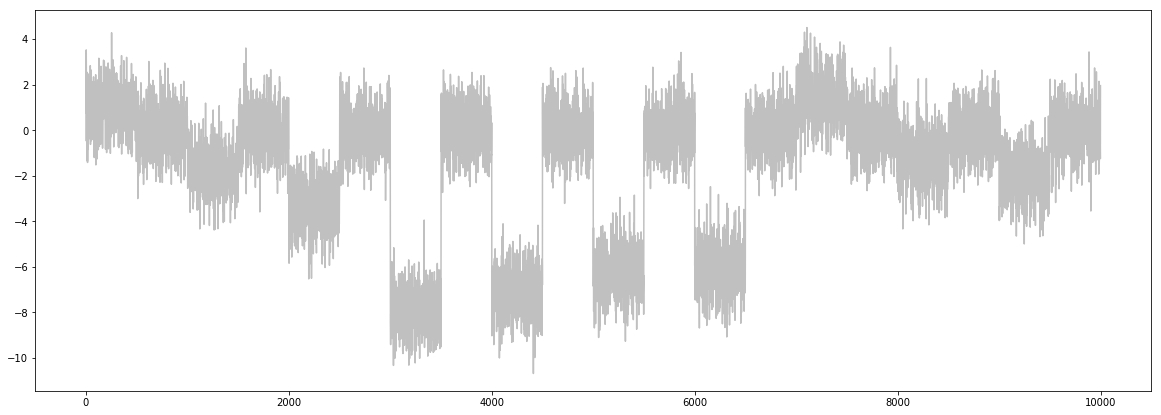

In [2]:
# Generate a series with normal distribution
N = 10000
data = pd.Series(np.random.normal(size = N))

# Insertion of disturbances
n_of_segments = int(N/20)
i = n_of_segments
while i < N:
    data[i - n_of_segments: i] += np.random.normal()*5
    i += n_of_segments*2
    
# Plot
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(20, 7)
sns.lineplot(data = data, ax = axs, color = "silver")

Series Size =  10000 
L0 (Minimum Segment Size) =  20 
Maximum Number of Segments ( ceil(n / L0) ) =  500


Finished.
> Segment [1]	 Start: 0	 Non-segmentable: 1
> Segment [2]	 Start: 497	 Finish: 539	 Non-segmentable: 1
> Segment [3]	 Start: 540	 Finish: 566	 Non-segmentable: 1
> Segment [4]	 Start: 567	 Finish: 1003	 Non-segmentable: 1
> Segment [5]	 Start: 1004	 Finish: 1499	 Non-segmentable: 1
> Segment [6]	 Start: 1500	 Finish: 2000	 Non-segmentable: 1
> Segment [7]	 Start: 2001	 Finish: 2501	 Non-segmentable: 1
> Segment [8]	 Start: 2502	 Finish: 3000	 Non-segmentable: 1
> Segment [9]	 Start: 3001	 Finish: 3498	 Non-segmentable: 1
> Segment [10]	 Start: 3499	 Finish: 4000	 Non-segmentable: 1
> Segment [11]	 Start: 4001	 Finish: 4500	 Non-segmentable: 1
> Segment [12]	 Start: 4501	 Finish: 5000	 Non-segmentable: 1
> Segment [13]	 Start: 5001	 Finish: 5500	 Non-segmentable: 1
> Segment [14]	 Start: 5501	 Finish: 6000	 Non-segmentable: 1
> Segment [15]	 Start: 6001	 Finish: 6500	 No

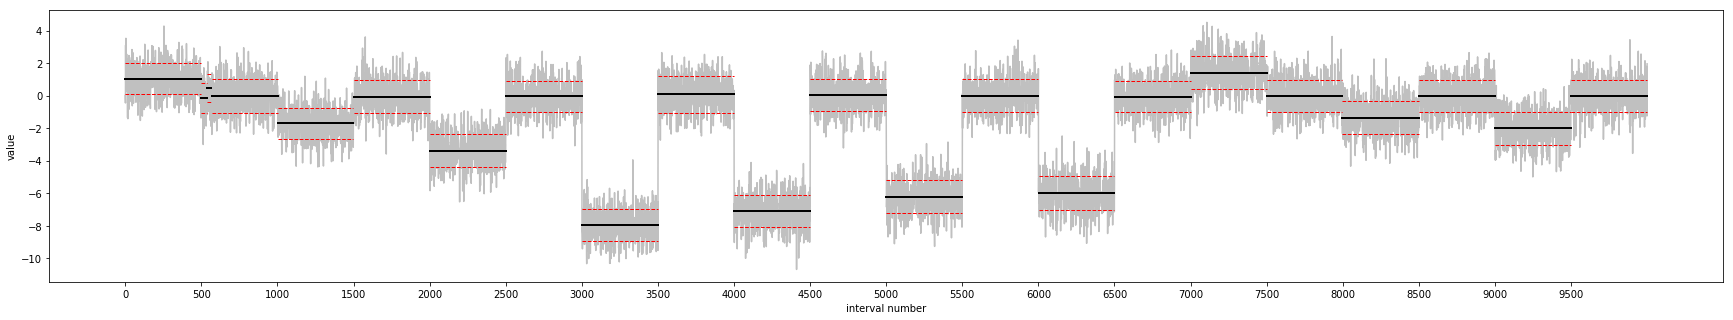

In [3]:
# Apply the segmentation algorithm.

seg_res = seg.segment(data.values, show_pic = 1, output_name = "test")

In [5]:
seg_res

,start,finish,size,mean,variance
index,,,,,
1,0.0,500.0,500.0,-7.539296,0.978636
2,501.0,1000.0,500.0,0.029774,0.985950
3,1001.0,1499.0,499.0,2.159952,1.086494
4,1500.0,2000.0,501.0,0.004821,0.983508
5,2001.0,2500.0,500.0,6.145142,0.994423
6,2501.0,3000.0,500.0,-0.011899,1.027260
7,3001.0,3500.0,500.0,8.646935,0.893322
8,3501.0,4000.0,500.0,-0.037464,0.962083
9,4001.0,4500.0,500.0,6.383893,1.062226
